# Salary Prediction 

## Dataset and libraries importing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('salary.csv')

In [3]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [5]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [7]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [8]:
data.rename(columns = {'AGENCY' : 'Agency', 'AGENCY NAME' : 'Agency_Name', 'LAST NAME' : 'Last_Name', 'FIRST NAME' : 'First_Name', 'MI' : 'Mi', 'CLASS CODE' : 'Class_Code',
       'CLASS TITLE' : 'Class_Title', 'ETHNICITY' : 'Ethnicity', 'GENDER' : 'Gender', 'STATUS' : 'Status', 'EMPLOY DATE' : 'Employ_Date',
       'HRLY RATE' : 'Hrly_Rate', 'HRS PER WK' : 'Hrs_per_wk', 'MONTHLY' : 'Monthly', 'ANNUAL' : 'Annual', 'STATE NUMBER' : 'State_No',
       'duplicated' : 'Duplicated', 'multiple_full_time_jobs' : 'Multiple_jobs', 'combined_multiple_jobs' : 'Combined_jobs',
       'summed_annual_salary' : 'Ann_salary', 'hide_from_search' : 'Hide'}, inplace = True)

In [9]:
data

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Ethnicity,Gender,Status,...,Hrly_Rate,Hrs_per_wk,Monthly,Annual,State_No,Duplicated,Multiple_jobs,Combined_jobs,Ann_salary,Hide
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [10]:
data.columns

Index(['Agency', 'Agency_Name', 'Last_Name', 'First_Name', 'Mi', 'Class_Code',
       'Class_Title', 'Ethnicity', 'Gender', 'Status', 'Employ_Date',
       'Hrly_Rate', 'Hrs_per_wk', 'Monthly', 'Annual', 'State_No',
       'Duplicated', 'Multiple_jobs', 'Combined_jobs', 'Ann_salary', 'Hide'],
      dtype='object')

## Task I EDA 

## Univariate Analysis 

In [11]:
import sweetviz as sv

In [12]:
report = sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [13]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Annual', ylabel='Count'>

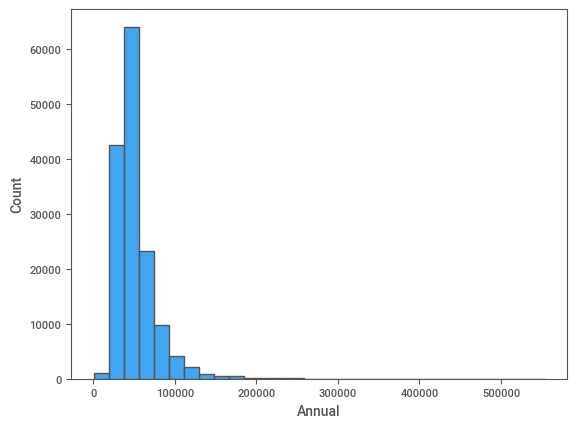

In [14]:
sns.histplot(x = 'Annual', data = data, bins = 30)

<Axes: xlabel='Monthly', ylabel='Count'>

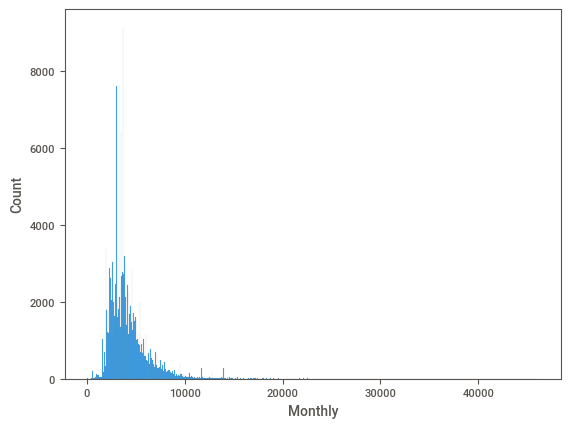

In [15]:
sns.histplot(x = 'Monthly', data = data)

<Axes: xlabel='Hrly_Rate', ylabel='Count'>

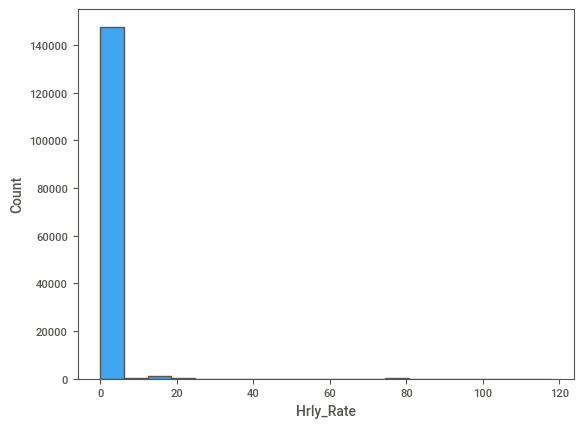

In [16]:
sns.histplot(x = 'Hrly_Rate', data = data)

<Axes: xlabel='Hrs_per_wk', ylabel='Count'>

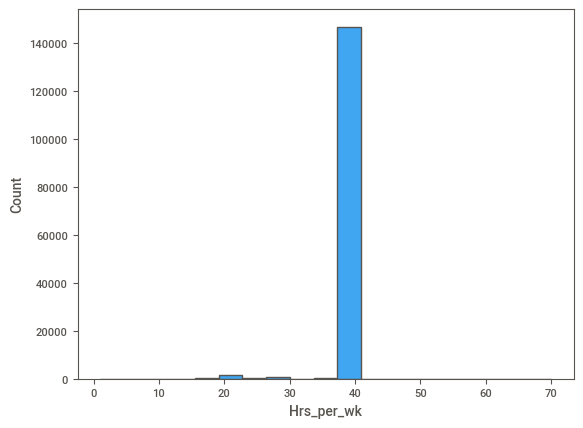

In [17]:
sns.histplot(x = 'Hrs_per_wk', data = data)

## Bi Variate Analysis 

In [18]:
data.head()

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Ethnicity,Gender,Status,...,Hrly_Rate,Hrs_per_wk,Monthly,Annual,State_No,Duplicated,Multiple_jobs,Combined_jobs,Ann_salary,Hide
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [19]:
for columns in data:
    print(columns)

Agency
Agency_Name
Last_Name
First_Name
Mi
Class_Code
Class_Title
Ethnicity
Gender
Status
Employ_Date
Hrly_Rate
Hrs_per_wk
Monthly
Annual
State_No
Duplicated
Multiple_jobs
Combined_jobs
Ann_salary
Hide


In [20]:
df = data.drop(['Ethnicity', 'Gender', 'State_No'], axis = 1)

In [21]:
df

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual,Duplicated,Multiple_jobs,Combined_jobs,Ann_salary,Hide
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['Agency', 'Agency_Name', 'Last_Name', 'First_Name', 'Mi', 'Class_Code',
       'Class_Title', 'Status', 'Employ_Date', 'Hrly_Rate', 'Hrs_per_wk',
       'Monthly', 'Annual', 'Duplicated', 'Multiple_jobs', 'Combined_jobs',
       'Ann_salary', 'Hide'],
      dtype='object')

In [23]:
data.Agency_Name.unique()

array(['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION ',
       'OFFICE OF COURT ADMINISTRATION                    ',
       'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              ',
       'OFFICE OF THE ATTORNEY GENERAL                    ',
       'TEXAS DEPARTMENT OF TRANSPORTATION                ',
       'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         ',
       'BOARD OF EXAMINERS OF PSYCHOLOGISTS               ',
       'DEPARTMENT OF STATE HEALTH SERVICES               ',
       'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      ',
       'HEALTH AND HUMAN SERVICES COMMISSION              ',
       'DEPARTMENT OF AGRICULTURE                         ',
       'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        ',
       'SCHOOL FOR THE DEAF                               ',
       'SENATE                                            ',
       'LEGISLATIVE BUDGET BOARD                          ',
       'HOUSE OF REPRESENTATIVES                          ',
       'TEXAS FACILITIES

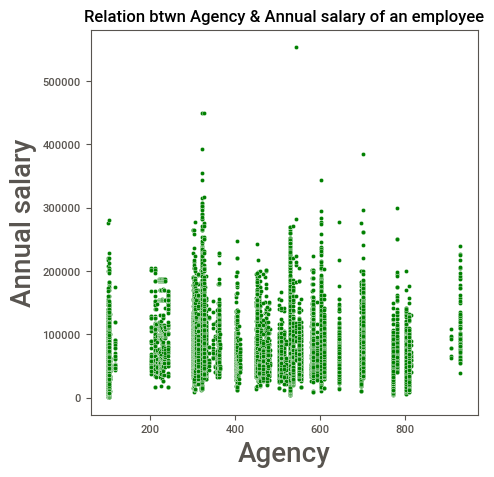

In [24]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='Agency', y='Annual', data = df, color = 'green')
plt.title('Relation btwn Agency & Annual salary of an employee')
plt.xlabel('Agency', fontsize = 20)
plt.ylabel('Annual salary', fontsize = 20)
plt.show()

In [25]:
data.Mi.unique()

array(['V', 'J', ' ', 'D', 'A', 'C', 'M', 'R', 'T', 'F', 'P', 'G', 'L',
       'K', 'E', 'S', 'W', 'N', 'X', 'O', 'B', 'H', 'Y', 'I', 'Z', 'U',
       'Q'], dtype=object)

In [26]:
data.Mi.isnull().sum()

0

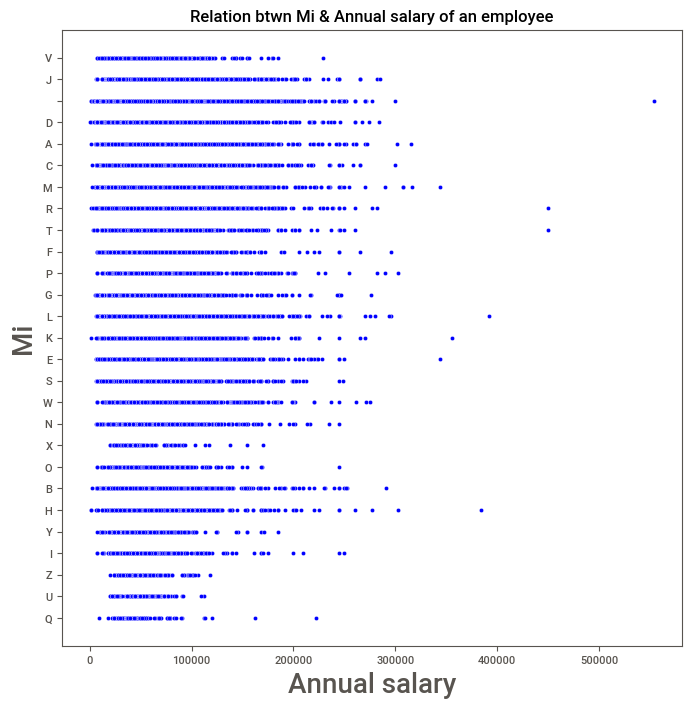

In [27]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='Annual', y='Mi', data = df, color = 'blue')
plt.title('Relation btwn Mi & Annual salary of an employee')
plt.xlabel('Annual salary', fontsize = 20)
plt.ylabel('Mi', fontsize = 20)
plt.show()

From the above plot we can analyze that the Mi variable with no alphabetical name has provided the highest paid salary to employee which is more tha 50000, R and T named category has provided the second highest salary to the employees which is between 400000 and 500000 and the low level highest salary offer was provided to the employees by U which is more than 100000

In [28]:
df.Class_Title.value_counts()

Class_Title
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

## Multivariate Analysis 

In [29]:
tdf = df.drop(['Duplicated', 'Multiple_jobs', 'Combined_jobs', 'Ann_salary', 'Hide'], axis = 1)

In [30]:
tdf

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92


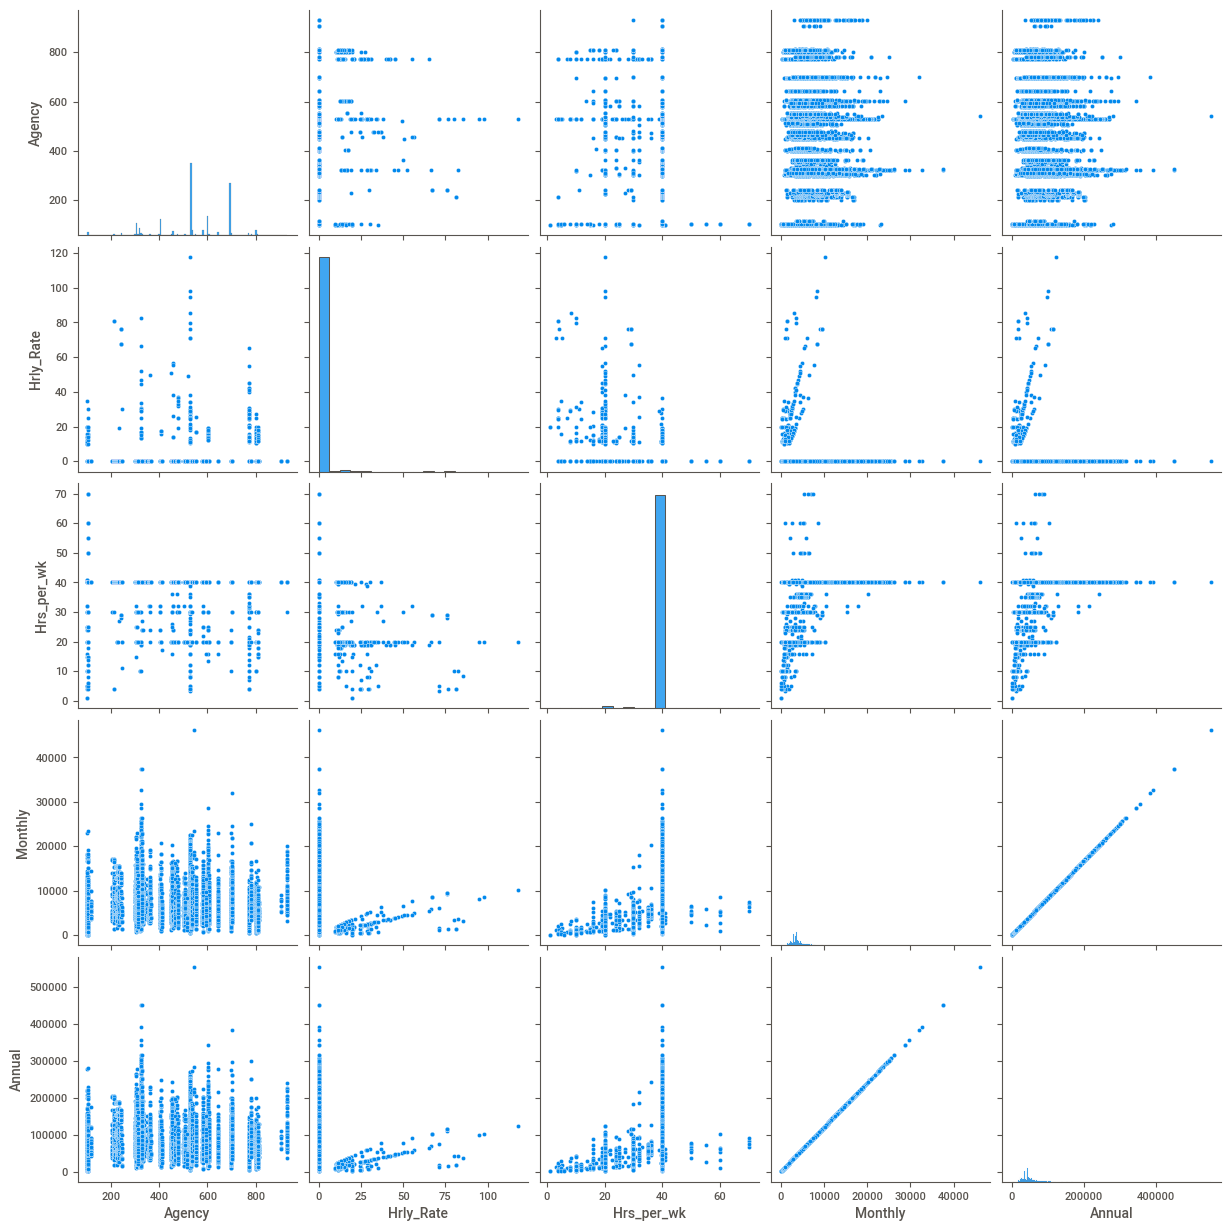

In [31]:
sns.pairplot(tdf)

## Data Preprocessing 

In [32]:
tdf

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92


In [33]:
name = pd.concat([tdf.First_Name, tdf.Last_Name], axis = 1)

In [34]:
name

,First_Name,Last_Name
0,MORTON,RUCKER
1,MORTON,RUCKER
2,JOHN,SPECIA JR
3,JOHN,SPECIA JR
4,ESTHER,ONTIVEROS
...,...,...
149476,JOHN,WESSELS
149477,EVAN,WINDHAM
149478,DERRICK,WRIGHT
149479,DOUGLAS,YOUNG


In [35]:
name.columns

Index(['First_Name', 'Last_Name'], dtype='object')

In [36]:
name['Name'] = name['First_Name'] + ' ' + name['Last_Name']

In [37]:
name

,First_Name,Last_Name,Name
0,MORTON,RUCKER,MORTON RUCKER ...
1,MORTON,RUCKER,MORTON RUCKER ...
2,JOHN,SPECIA JR,JOHN SPECIA JR ...
3,JOHN,SPECIA JR,JOHN SPECIA JR ...
4,ESTHER,ONTIVEROS,ESTHER ONTIVEROS ...
...,...,...,...
149476,JOHN,WESSELS,JOHN WESSELS ...
149477,EVAN,WINDHAM,EVAN WINDHAM ...
149478,DERRICK,WRIGHT,DERRICK WRIGHT ...
149479,DOUGLAS,YOUNG,DOUGLAS YOUNG ...


In [38]:
tdf

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92


In [39]:
tdf['Name'] = tdf['First_Name'] + ' ' + tdf['Last_Name']

In [40]:
tdf

,Agency,Agency_Name,Last_Name,First_Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual,Name
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,MORTON RUCKER ...
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24,MORTON RUCKER ...
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84,JOHN SPECIA JR ...
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24,JOHN SPECIA JR ...
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,ESTHER ONTIVEROS ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,JOHN WESSELS ...
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,EVAN WINDHAM ...
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,DERRICK WRIGHT ...
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,DOUGLAS YOUNG ...


In [41]:
tdf = tdf[['Agency', 'Agency_Name', 'Name', 'Mi', 'Class_Code', 'Class_Title', 'Status', 'Employ_Date', 'Hrly_Rate', 'Hrs_per_wk', 'Monthly', 'Annual']]

In [42]:
tdf

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92


In [43]:
tdf['Employ_Date'] = pd.to_datetime(tdf['Employ_Date'], errors='coerce', infer_datetime_format=True)

In [44]:
tdf['Year'] = tdf['Employ_Date'].dt.year

In [45]:
tdf

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Employ_Date,Hrly_Rate,Hrs_per_wk,Monthly,Annual,Year
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,9545.82,114549.84,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,1404.77,16857.24,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,9545.82,114549.84,2020
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,1404.77,16857.24,2018
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,3284.27,39411.24,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-30,0.00000,40.0,2899.00,34788.00,2017
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2015-07-13,0.00000,40.0,5500.00,66000.00,2015
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,2012-10-15,12.93000,20.0,1120.60,13447.20,2012
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,1989-09-22,0.00000,40.0,5744.16,68929.92,1989


In [46]:
tdf.drop('Employ_Date', axis = 1, inplace = True)

In [47]:
tdf

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Hrly_Rate,Hrs_per_wk,Monthly,Annual,Year
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,2020
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,2018
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,34788.00,2017
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,66000.00,2015
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20,2012
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,68929.92,1989


In [48]:
tdf = tdf[['Agency', 'Agency_Name', 'Name', 'Mi', 'Class_Code', 'Class_Title', 'Status', 'Year', 'Hrly_Rate', 'Hrs_per_wk', 'Monthly', 'Annual']]

In [49]:
tdf

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Year,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,1988,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,2020,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2017,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2015,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,2012,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,1989,0.00000,40.0,5744.16,68929.92


<Axes: xlabel='Year', ylabel='Annual'>

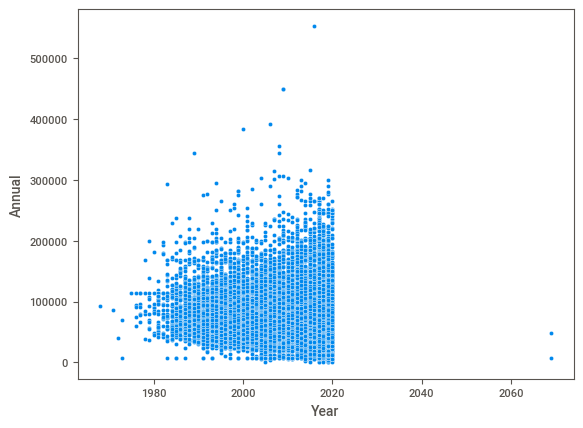

In [50]:
#let's take a look between the relation between the year and the annual salary

sns.scatterplot(x = 'Year', y = 'Annual', data = tdf)

we can see that given data is from 1960s' to 2020s' and the salary has gradually increased from 1980 to 2020.
And the highest salary wage has been offered to the employee in between the 2010 to 2020 and it was more than 500000.

In [51]:
tdf.head()

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Year,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,1988,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,2020,0.00000,40.0,3284.27,39411.24


## Convert Categorical data into Numerical data 

Here Agency_Name, Name, Status, Class_Title are Nominal data - One hot encoding

Mi, Class_Code are Ordinal data - Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [53]:
odata = tdf[['Mi', 'Class_Code']]

In [54]:
odata

,Mi,Class_Code
0,V,JD25
1,V,3524
2,J,JD25
3,J,3524
4,,4504
...,...,...
149476,P,6232
149477,A,302
149478,C,130
149479,R,1572


In [55]:
#apply label encoding to odata

for column in odata:
    odata[column] = odata[column].astype(str)
    odata[column] = lc.fit_transform(odata[column])

In [56]:
odata

,Mi,Class_Code
0,22,1409
1,22,578
2,10,1409
3,10,578
4,0,773
...,...,...
149476,16,1021
149477,1,493
149478,3,102
149479,18,148


In [57]:
ndata = tdf[['Agency_Name', 'Name', 'Class_Title', 'Status']]

In [58]:
ndata

,Agency_Name,Name,Class_Title,Status
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME


In [59]:
ndata.drop('Agency_Name', axis = 1, inplace = True)

In [60]:
ndata

,Name,Class_Title,Status
0,MORTON RUCKER ...,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
1,MORTON RUCKER ...,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
2,JOHN SPECIA JR ...,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
3,JOHN SPECIA JR ...,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
4,ESTHER ONTIVEROS ...,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...
149476,JOHN WESSELS ...,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149477,EVAN WINDHAM ...,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149478,DERRICK WRIGHT ...,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME
149479,DOUGLAS YOUNG ...,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME


In [61]:
ndata.drop('Name', axis = 1, inplace = True)

In [62]:
ndata

,Class_Title,Status
0,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
1,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME
3,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME
4,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...
149476,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149477,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME
149478,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME
149479,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME


In [63]:
ndata = pd.get_dummies(ndata, columns = ['Class_Title', 'Status'], dtype = int, drop_first = True)

In [64]:
ndata

,Class_Title_19 EXECUTIVE ASSISTANT,Class_Title_20 PROGRAM SPECIALIST III,Class_Title_21 BUSINESS ANALYST,Class_Title_21 SYSTEMS ADMINISTRATOR III,Class_Title_23 COMPLIANCE MANAGER,Class_Title_23 SYSTEMS ADMINISTRATOR IV,Class_Title_24 PROGRAMMER ANALYST VI,Class_Title_24 SYSTEM ANALYST VI,Class_Title_26 ASSISTANT DIRECTOR IAC,Class_Title_AC & BOILER OPER I,...,Status_CRP - CLASSIFIED REGULAR PART-TIME,Status_CTF - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY PART-TIME,Status_ERF - EXEMPT REGULAR FULL-TIME,Status_ERP - EXEMPT REGULAR PART-TIME,Status_URF - UNCLASSIFIED REGULAR FULL-TIME,Status_URP - UNCLASSIFIED REGULAR PART-TIME,Status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,Status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149478,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
tdf

,Agency,Agency_Name,Name,Mi,Class_Code,Class_Title,Status,Year,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",MORTON RUCKER ...,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,1988,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,MORTON RUCKER ...,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2015,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JOHN SPECIA JR ...,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,2020,75.96150,29.0,9545.82,114549.84
3,212,OFFICE OF COURT ADMINISTRATION ...,JOHN SPECIA JR ...,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,2018,81.04453,4.0,1404.77,16857.24
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ESTHER ONTIVEROS ...,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,2020,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,JOHN WESSELS ...,P,6232,SECURITY OFFICER III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2017,0.00000,40.0,2899.00,34788.00
149477,809,STATE PRESERVATION BOARD ...,EVAN WINDHAM ...,A,302,WEB ADMINISTRATOR III ...,CRF - CLASSIFIED REGULAR FULL-TIME,2015,0.00000,40.0,5500.00,66000.00
149478,809,STATE PRESERVATION BOARD ...,DERRICK WRIGHT ...,C,130,CUSTOMER SERVICE REP I ...,CRP - CLASSIFIED REGULAR PART-TIME,2012,12.93000,20.0,1120.60,13447.20
149479,809,STATE PRESERVATION BOARD ...,DOUGLAS YOUNG ...,R,1572,PROGRAM SPECIALIST III ...,CRF - CLASSIFIED REGULAR FULL-TIME,1989,0.00000,40.0,5744.16,68929.92


In [66]:
tdf.drop(['Agency_Name', 'Name', 'Mi', 'Class_Code', 'Class_Title', 'Status'], axis = 1, inplace = True)

In [67]:
tdf

,Agency,Year,Hrly_Rate,Hrs_per_wk,Monthly,Annual
0,241,1988,75.96150,29.0,9545.82,114549.84
1,212,2015,81.04454,4.0,1404.77,16857.24
2,241,2020,75.96150,29.0,9545.82,114549.84
3,212,2018,81.04453,4.0,1404.77,16857.24
4,696,2020,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...
149476,809,2017,0.00000,40.0,2899.00,34788.00
149477,809,2015,0.00000,40.0,5500.00,66000.00
149478,809,2012,12.93000,20.0,1120.60,13447.20
149479,809,1989,0.00000,40.0,5744.16,68929.92


In [68]:
fd = pd.concat([tdf, ndata], axis = 1)

In [69]:
fd

,Agency,Year,Hrly_Rate,Hrs_per_wk,Monthly,Annual,Class_Title_19 EXECUTIVE ASSISTANT,Class_Title_20 PROGRAM SPECIALIST III,Class_Title_21 BUSINESS ANALYST,Class_Title_21 SYSTEMS ADMINISTRATOR III,...,Status_CRP - CLASSIFIED REGULAR PART-TIME,Status_CTF - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY PART-TIME,Status_ERF - EXEMPT REGULAR FULL-TIME,Status_ERP - EXEMPT REGULAR PART-TIME,Status_URF - UNCLASSIFIED REGULAR FULL-TIME,Status_URP - UNCLASSIFIED REGULAR PART-TIME,Status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,Status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,241,1988,75.96150,29.0,9545.82,114549.84,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,212,2015,81.04454,4.0,1404.77,16857.24,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,241,2020,75.96150,29.0,9545.82,114549.84,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,212,2018,81.04453,4.0,1404.77,16857.24,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,696,2020,0.00000,40.0,3284.27,39411.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,2017,0.00000,40.0,2899.00,34788.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149477,809,2015,0.00000,40.0,5500.00,66000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149478,809,2012,12.93000,20.0,1120.60,13447.20,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149479,809,1989,0.00000,40.0,5744.16,68929.92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


sns.heatmap(fd.corr(), annot = True)

In [70]:
x = fd.drop('Annual', axis = 1)

In [71]:
y = fd[['Annual']]

In [72]:
x

,Agency,Year,Hrly_Rate,Hrs_per_wk,Monthly,Class_Title_19 EXECUTIVE ASSISTANT,Class_Title_20 PROGRAM SPECIALIST III,Class_Title_21 BUSINESS ANALYST,Class_Title_21 SYSTEMS ADMINISTRATOR III,Class_Title_23 COMPLIANCE MANAGER,...,Status_CRP - CLASSIFIED REGULAR PART-TIME,Status_CTF - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY FULL-TIME,Status_CTP - CLASSIFIED TEMPORARY PART-TIME,Status_ERF - EXEMPT REGULAR FULL-TIME,Status_ERP - EXEMPT REGULAR PART-TIME,Status_URF - UNCLASSIFIED REGULAR FULL-TIME,Status_URP - UNCLASSIFIED REGULAR PART-TIME,Status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,Status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,241,1988,75.96150,29.0,9545.82,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,212,2015,81.04454,4.0,1404.77,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,241,2020,75.96150,29.0,9545.82,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,212,2018,81.04453,4.0,1404.77,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,696,2020,0.00000,40.0,3284.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,2017,0.00000,40.0,2899.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149477,809,2015,0.00000,40.0,5500.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149478,809,2012,12.93000,20.0,1120.60,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149479,809,1989,0.00000,40.0,5744.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y

,Annual
0,114549.84
1,16857.24
2,114549.84
3,16857.24
4,39411.24
...,...
149476,34788.00
149477,66000.00
149478,13447.20
149479,68929.92


## Task II Model Creation 

In [74]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 100)

In [75]:
x_train.shape

(119584, 1436)

In [76]:
x_test.shape

(29897, 1436)

In [77]:
y_train.shape

(119584, 1)

In [78]:
y_test.shape

(29897, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

In [ ]:
y_pred = reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train, y_train)

In [ ]:
reg_rf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE
print(rmse)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

## Task III  

## Outliers 

In [ ]:
tdf

In [ ]:
#Lets find out the boundaries i.e., the min value and the max value of the Annual salary and the monthly salary

sns.histplot(x='Annual', data = tdf)

In [ ]:
sns.histplot(x='Monthly', data = tdf)

In [ ]:
#Outliers in the salaries - Lets find out them by using box plot

#Boxplot on Monthly basis

sns.boxplot(x = tdf['Monthly'], y = tdf['Agency'])
plt.title('Box plot on Monthly basis')
plt.show()

In [ ]:
#Boxplot on Annual Basis

sns.boxplot(x = tdf['Annual'], y = tdf['Agency'])
plt.title('Box plot on Annual Basis')
plt.show()

From the above plots we can consider that mostly all the outliers are from the agencies with codes below 200 and the codes above 600

## Biggest wages disparties in departments

In [ ]:
data

In [ ]:
wd = data[['Class_Code', 'Monthly', 'Annual']]

In [ ]:
wd

In [ ]:
wd.Class_Code.value_counts()

In [ ]:
wd1 = wd[wd['Class_Code'] == '4504']

In [ ]:
wd1

In [ ]:
wd1.Monthly.value_counts()

In [ ]:
max(wd1['Monthly']) - min(wd1['Monthly'])

In [ ]:
l = list[wd1['Monthly'].unique]

In [ ]:
l

l = []
for i in wd1.Monthly:
    l = l.append(i)
    i += 1
print(max(l) - min(l))

In [ ]:
wd1.Monthly

## Salaries to the roles are changed over the time 

In [ ]:
data.head()

In [ ]:
data1 = data[['Class_Title', 'Employ_Date', 'Annual']]

In [ ]:
data1

In [ ]:
data1['Employ_Date'] = pd.to_datetime(data1['Employ_Date'], errors='coerce', infer_datetime_format=True)

In [ ]:
data1['Year'] = data1['Employ_Date'].dt.year

In [ ]:
data1

In [ ]:
data1.drop('Employ_Date', axis = 1, inplace = True)

In [ ]:
data1

In [ ]:
for column in data1:
    data1[column] = data1[column].astype(str)
    data1[column] = lc.fit_transform(data1[column])

In [ ]:
data1

In [ ]:
data1.Class_Title.unique

In [ ]:
data1.Class_Title.value_counts()

In [ ]:
data.head()

In [ ]:
data['Employ_Date'] = pd.to_datetime(data['Employ_Date'], errors='coerce', infer_datetime_format=True)

In [ ]:
year = pd.DataFrame()
year['Year'] = pd.Series(data['Employ_Date'].dt.year)

In [ ]:
year

In [ ]:
data1

In [ ]:
data1.drop('Year', axis=1, inplace = True)

In [ ]:
data1

In [ ]:
rfd = pd.concat([data1, year], axis = 1)

In [ ]:
rfd

In [ ]:
rfd.Class_Title.value_counts()

In [ ]:
CT = rfd[rfd['Class_Title'] == 292]

In [ ]:
CT

In [ ]:
CT1 = CT[CT['Year'] == 2020]

In [ ]:
CT2 = CT[CT['Year'] == 1995]

In [ ]:
print(CT1)

In [ ]:
print(min(CT1.Annual))

In [ ]:
print(max(CT1.Annual))

In [ ]:
max(CT1.Annual) - min(CT1.Annual)

In [ ]:
CT2

In [ ]:
max(CT1.Annual) - min(CT1.Annual)

In [ ]:
#Now we have the separate data for the role with Class_Title = 292, So lets draw its salary variation over the period of time

min(CT.Year)

In [ ]:
max(CT.Year)

In [ ]:
#Here 292 Class_Title role starts from 1995 to 2020

sns.lineplot(x = 'Year', y = 'Annual', data = CT)
plt.title('Salary variation of Class_Title - 292 from 1995 to 2020')
plt.show()

## Task IV Model Report 

We have built the Random Forest Regressor model to find out the information about the salaries of the Texas employees and we have achieved r2 upto 99%.

## Task V Challenges faced 

Challenges faced by my team is - To find out the logic information how to extract the relation between employees salaries and the Agencies, their roles.